## Credit card fraud detection

Project 2
## FindDefault (Prediction of Credit Card fraud)
### Problem Statement:
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have **492 frauds out of 284,807 transactions**. The dataset is highly unbalanced, the positive class (frauds) **account for 0.172% of all transactions.**
We have to build a classification model to predict whether a transaction is fraudulent or not.


### Your focus in this project should be on the following: 
The following is recommendation of the steps that should be employed towards attempting to solve this problem statement: 
- **Exploratory Data Analysis:** Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations. 
- **Data Cleaning:** This might include standardization, handling the missing values and outliers in the data. 
- **Dealing with Imbalanced data:** This data set is highly imbalanced. The data should be balanced using the appropriate methods before moving onto model building.
- **Feature Engineering:** Create new features or transform the existing features for better performance of the ML Models. 
- **Model Selection:** Choose the most appropriate model that can be used for this project. 
- **Model Training:** Split the data into train & test sets and use the train set to estimate the best model parameters. 
- **Model Validation:** Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting. 
- **Model Deployment:** Model deployment is the process of making a trained machine learning model available for use in a production environment. 



### Timeline 
We expect you to do your best and submit a solution within 2 weeks. 
Deliverables 
Please share the following deliverables in a zip file. 
- A report (PDF) detailing: 
-	Description of design choices and Performance evaluation of the model 
-	Discussion of future work 
-	The source code used to create the pipeline 
 


### Tasks/Activities List 
Your code should contain the following activities/Analysis: 
- Collect the time series data from the CSV file linked here. 
- Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, outliers etc if any. 
- Get the correct datatype for date. 
- Balancing the data.
- Feature Engineering and feature selection. 
- Train/Test Split - Apply a sampling distribution to find the best split. 
- Choose the metrics for the model evaluation 
- Model Selection, Training, Predicting and Assessment 
- Hyperparameter Tuning/Model Improvement 
- Model deployment plan. 

### Success Metrics 
Below are the metrics for the successful submission of this case study. 
- The accuracy of the model on the test data set should be > 75% (Subjective in nature) 
- Add methods for Hyperparameter tuning. 
- Perform model validation. 
 

### Bonus Points 
- You can package your solution in a zip file included with a README that explains the installation and execution of the end-to-end pipeline. 
- You can demonstrate your documentation skills by describing how it benefits our company. 

Data:
The dataset for this project can be accessed by clicking the link provided below.
creditcard.csv


**The aim of this project is to correctly identify fraudulent transactions based on the available features. This is a classification problem wherein we need to decide whether or not a transaction is fraudulent or legitimate based on the transaction features provided to us.**

## Importing the necessary libraries

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#hiding warnings
import warnings
warnings.filterwarnings('ignore')

## Importing data

**First we import the data from the creditcard.csv file as a Pandas Dataframe, called "df".**

In [3]:
df = pd.read_csv("creditcard.csv")

**Checking the first 5 records of the dataframe using the head function.**

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

### Next we do some basic Exploratory Data Analysis to understand the structure of the data, starting with the shape attribute to get the number of rows and columns in the DataFrame.

In [5]:
df.shape

(284807, 31)

### Next we use the describe method to get the count, mean, Standard Devaition, Median and other statistical attributes of the Data.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
print("\033[1mHere we calculate the statistical relations of the fraud with time.")

print("Assuming the time is in seconds and it indicates the frequency of a fraud, we can imply that: \033[0m")
print(f"A credit card fraud, on average, takes place every {str(datetime.timedelta(seconds=94814))} hours")
print(f"The standard deviation of the time is {str(datetime.timedelta(seconds=47488))} hours and the median is around {str(datetime.timedelta(seconds=84692))} hours")

Here we calculate the statistical relations of the fraud with time.
Assuming the time is in seconds and it indicates the frequency of a fraud, we can imply that: 
A credit card fraud, on average, takes place every 1 day, 2:20:14 hours
The standard deviation of the time is 13:11:28 hours and the median is around 23:31:32 hours



### Some conclusions which can be drawn from the numerical statistics are as follows: 
- Assuming that the time feature is in seconds and indicates the frequency of the credit card fraud, we can see that 
    on average a fraud takes place every 94814 seconds or 1 day, 2 hours and 20 minutes.
    However the standard deviation is around 13 hours and the median is around 23 hours, so the frauds may be more or less frequent, but are close to
    1 credit card fraud per day. These are calculated in the cell above.
- The other features (V1 to V28) are anonymous.
- The mean of the other features is almost zero. They are in the order of $10^{-15}$ to $10^{-16}$, so there is a strong chance that the data has been normalized using Prinicipal Component Analysis or other standardization techniques.
- The mean transaction amount is ~88, the standard deviation is ~250 and the median is ~22. As the median is much larger than the mean, it indicates that the amount is right skewed. There would be a some large outliers, but most values would be small. This is also indicated by the large difference between the 75th percentile which is ~77 and the maximum amount which is around 25.6k. Also the large standard deviation indicates that the data is spread apart. These conclusions are indicated by the visulations below: 


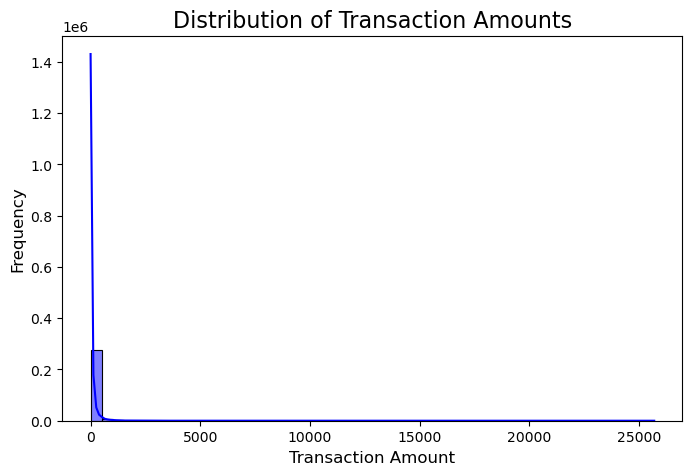

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')

# Adding labels and title
plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

### It can be seen that the amount is highly skewed to the right, with most values being under 100. To visualise just the smaller values (under 200), we can filter the amount to plot them:


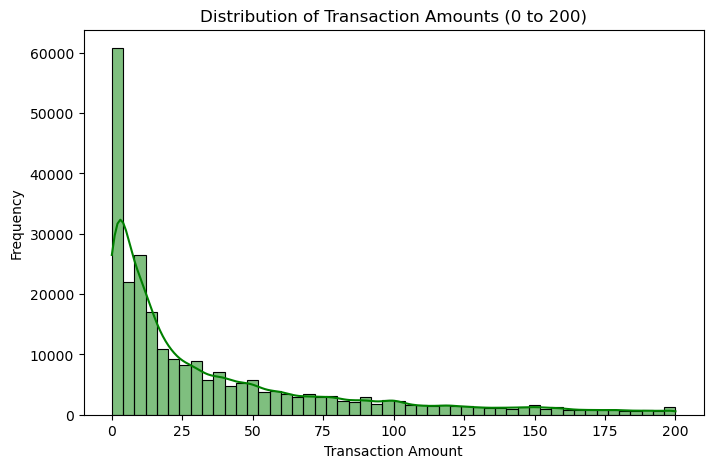

In [9]:
filtered_data = df[df['Amount'] <= 200]  #Filtering amount for values under 200.

# Plot the distribution of the 'Amount' feature in the specified range
plt.figure(figsize=(8,5))
sns.histplot(filtered_data['Amount'], bins=50, kde=True, color='green')

# Adding labels and title
plt.title('Distribution of Transaction Amounts (0 to 200)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


**The histogram reiterates that majority of the transactions are low valued, and the amount is highly right skewed.**

### Next we see the distribution of the output label, class

In [10]:
print(df['Class'].value_counts())
#Calculating the percentage of each class.
percentage_class = (df['Class'].value_counts() / len(df)) * 100
print(f"\nThe percentage of legitimate transactions: {percentage_class[0]:.2f}%")
print(f"Percentage of fraud transactions: {percentage_class[1]:.2f}%")

Class
0    284315
1       492
Name: count, dtype: int64

The percentage of legitimate transactions: 99.83%
Percentage of fraud transactions: 0.17%


### We can see that the class is highly imbalanced. There are kust 492 (0.17%) fraudulent transactions. This can also be seen by the bargraph of the class distribution below:

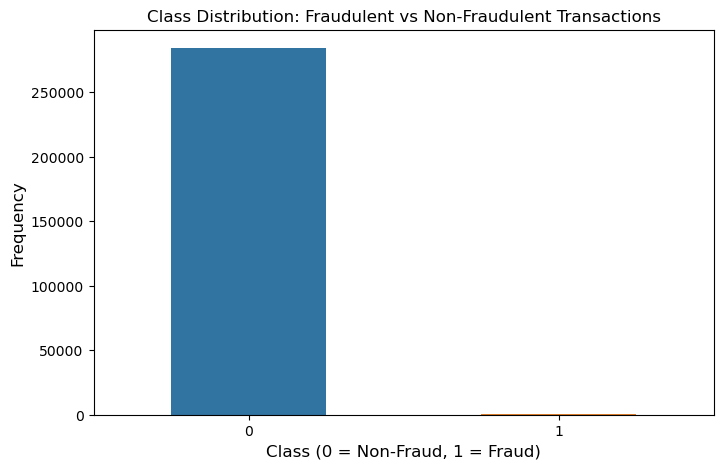

In [11]:
class_count = df['Class'].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x = class_count.index, y = class_count.values, width=0.5)
plt.title('Class Distribution: Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Next we find the correlation between the features and the target (class). 

**As the features (V1 to V28) are normalized, most likely by PCA, there is no correlation between them, as can be seen by the following heatmap.**

In [12]:
correlation_matrix = df.corr()
print(correlation_matrix)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

**We can find the correlation values between just the output and the features as follows:**

In [13]:
correlations_with_target = df.corr()['Class'].sort_values(ascending=False)

# Display the correlations
print(correlations_with_target)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


### Next we look at how the fraud and non-fraud transactions are distributed across time and amount

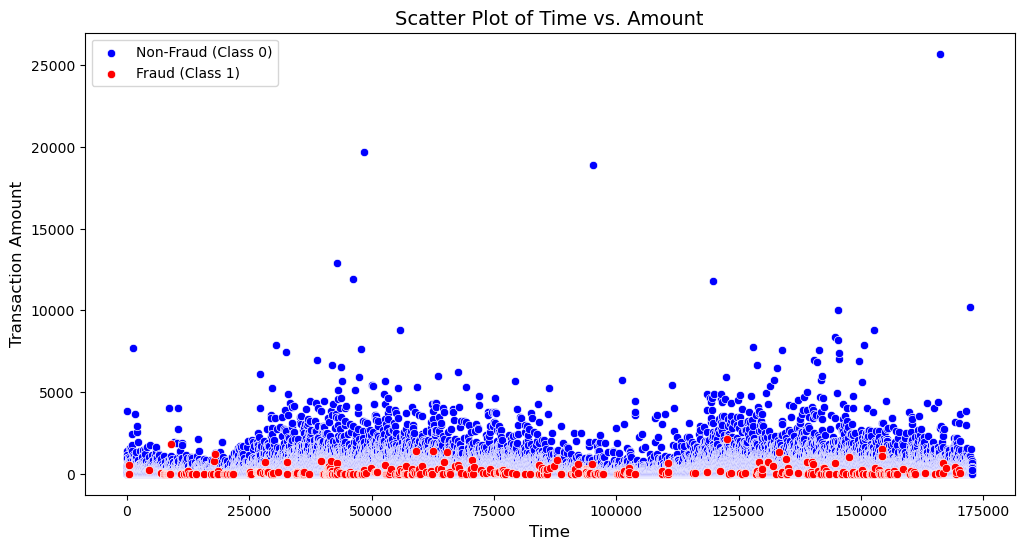

In [14]:
plt.figure(figsize=(12, 6))

# Non-fraud transactions filtering for scatterplot
sns.scatterplot(
    data=df[df['Class'] == 0],
    x='Time', y='Amount', label='Non-Fraud (Class 0)', color='blue'
)

# Fraud transactions filering for scatterplot
sns.scatterplot(
    data=df[df['Class'] == 1],
    x='Time', y='Amount', label='Fraud (Class 1)',  color='red'
)

plt.title('Scatter Plot of Time vs. Amount', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.legend()
plt.show()

### It can be seen there is no apparent relation between the fraudulent transactions and the time component. However the distribution of the amount with the fraud and non-fraud transactions is not very clear, as the scatter plots are heavily distributed in the lower amounts. We can calculate the average amount for fraud and non-fraud transactions to get an estimate of what amounts most fraud and legitimate transactions take place.

In [15]:
mean_fraud = df[df['Class'] == 1]['Amount'].mean()
mean_non_fraud = df[df['Class'] == 0]['Amount'].mean()

print(f"The mean fraud transaction happens at an amount of {np.round(mean_fraud,3)}")
print(f"The mean fraud transaction happens at an amount of {np.round(mean_non_fraud,3)}")

The mean fraud transaction happens at an amount of 122.211
The mean fraud transaction happens at an amount of 88.291


**The fraud transactions happen at a higher amount on average than the non-fraud transactions**

# Data Cleaning and Transformation

### Next we mover towards cleaning the data. 


### First we can check if there are any missing values:

In [16]:
#Checking for any missing values
missing_values = df.isnull().sum()

#Printing the number of missing values in each column
print(missing_values)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### There are no missing values in any of the features/label

### Next we look at the outliers of the different features. As the anonymous features are normalized, they do not have significant outliers. The amount however does have outlying values as indicated by the following plot.

### The box-plot is a good way to visualise the amount.

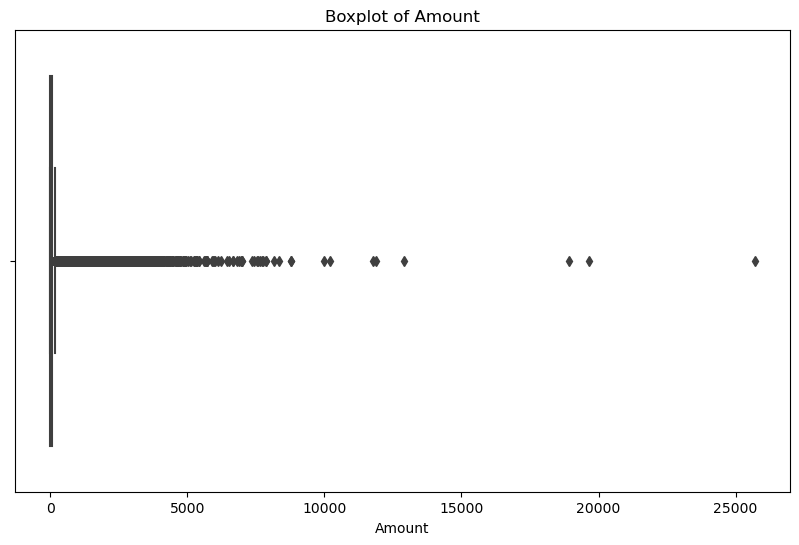

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Amount')
plt.show()

**The "amount" feature has a lot of outlier features as indicated by the box-plot above. This is expected as there are some higher amounts of credit card transactions, with the highest amount at around 25,000. However most transactions are concentrated at lower amounts of about 100. In this particular situation, however, we do not perfrom any Outlier treatment on the amount, as the higher amounts are indicative of an important aspect of credit card transactions.**

# Data Preprocessing

**To begin with the creation of our fraud-detection model, we first need to split the data into training and testing sets. This ensures that we a dataset to train our model with and also a dataset to evluate the performance of the model. 80% of the data is used for training the models and the remaining 20% is kept for the testing.**

### Train-test split

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

#Splitting the data into train and test dataframes, in the ratio of 80:20. The stratify parameter is used and the output is passed to it
#This ensures that the train and test dataframes have the same representation of the minority class.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**The train_test_split method is used to split the data into training and testing sets. Also the output labels ('y') are passed in the "stratify" parameter of the method. This method ensures that the output class labels are evenly distributed in the specified ratio (80:20). This is important because the number of data points which are fraudulent is extremely small (~0.17%), which if the data is randomly split might be completely eliminated in on of the dataframes. Also a random_state parameter is specified which ensures that the same results are replicated each time the program is executed.**



**Next we check the shape of the train and test dataframes after splitting indicating an 80:20 split:**

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

### SMOTE

**Following the splitting of the data into train and test sets, because the data is highly imbalanced, with the fraud datapoints making up just 0.17% of the dataset, it is essential to balance out the data. Balancing the data is essential because if the data is extremely imabalanced the data models created to predict the fraud data would not make be accurate.**



**To start to deal with the extreme data imbalance, we use the Synthetic Minority Oversampling Technique (SMOTE) from the imblearn module. The SMOTE module is used to create synthetic data points for the minority class. This process is called Oversampling. The sampling_strategy parameter of SMOTE is used to select the number of synthetic samples of the minority class that are created.**

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
#initialising the SMOTE method
smote = SMOTE(sampling_strategy=0.1, random_state=42)  # Oversample minority class 

#Fitting the training data on the method for oversampling
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Random Under Sampling

**Following the creation of the synthetic minority data points, we need to ensure that the majority class is closer to the minority class to make the dataset more balanced. To do this we use the RandomUnderSampler, again from the imblearn module. The RandomUnderSampler reduces the number of instances of the majority class. The sampling_strategy parameter parameter decides the number (ratio) of the majority data samples left after Under sampling.**

In [21]:
#initialising the RandomUnderSampler method for undersampling the majority class
undersampler = RandomUnderSampler(sampling_strategy=0.2, random_state=42) 

#Fitting the trained data on the method.
X_train_upsampled, y_train_upsampled = undersampler.fit_resample(X_train_smote, y_train_smote)

**Now we check the number of samples left after using SMOTE and RandomUnderSampler**

In [22]:
from collections import Counter
print("Resampled dataset class distribution (after SMOTE and undersampling):")
print(Counter(y_train_upsampled))

Resampled dataset class distribution (after SMOTE and undersampling):
Counter({0: 113725, 1: 22745})


### Scaling

**Anoother important part of Data Transformation is to ensure that all the features of the dataset are represented on a similar scale. This is important because if one or more features are quantitatively large or small, they might get an incorrect representation during modelling, which could adversely effect the model's perfromance. As a result it is essential to bring the input features to a commom scale, so that all the features are equally represented, while their individual proportions are maintianed. This can be done using a number of Scaling techniques from SKLearn, but we use the StandardScaler here which scales most of the features (99.7%) in the range of -3 to 3, with a mean of 0 and standard deviation of 1.**

In [23]:
from sklearn.preprocessing import StandardScaler
#initialising the method
scaler = StandardScaler()

# Apply scaling to the training features
X_train_scaled = scaler.fit_transform(X_train_upsampled)

# Checking the type and shape again
print(f"X_scaled type after conversion: {type(X_train_scaled)}")
print(f"X_scaled shape after conversion: {X_train_scaled.shape}")

X_scaled type after conversion: <class 'numpy.ndarray'>
X_scaled shape after conversion: (136470, 30)


# Data Modelling

**After transforming the data into an appropriate form which can be used for modelling, we can begin creating out Machine Learning models for fraud prediction. Classification is a fundamental Machine Learning problem and there are several models which can be used to for classification. Some of them are used here.**



**We start with Logistic Regression. We first initialise the Logistic Regrerssion model, then fit it on the training set.**

## Logistic Regression

**The first step of making an ML model is to initialise it and fit the input features and the output label dataframes. This is done for the Logistic Regression model in the following cell. Some hyperparameters appropriate for the problem are also specified. A regularization parameter C is fixed to a low value due to the high imabalance in the data.**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000, C=0.0001)

# Fitting the model on the training set
logreg.fit(X_train_scaled, y_train_upsampled)


LogisticRegression(C=0.0001, max_iter=1000, random_state=42)

**<u>Model Evaluation:</u> There are several methods to evaluate the performance of a model. Some of these include accuracy, precision, recall, etc. However it is important to choose the correct evaluation metric for the model. Choosing the evaluation metric depends on a number of factors, including the type and nature of the problem, and the threhold tolerance.**
**For a problem like credit card fraud prediction, it is important to correctly identify frauds and catch them. Missing frauds or misclassifying them can be a big financial problem. Hence selecting an appropriate evaluation metric is essential to correctly estimate and evaluate the performance of the model. The following are the most common evaluation metrics and their meaning in context to credit card fraud prediction.**
- **<u>Accuracy:</u> Accuracy denotes the models ability to correctly predict an observation (fraud or non-fraud). It is not such a good metric in the context of fraud prediction as it also gives a major weightage to the non-fraud records, which might skew the results to a high value due to the inherent imbalance in the data, and this might not be necessarily indicative of a good classification model and can be misleading.**
- **<u>Precision:</u> Precision tells us the ratio of the correctly predicted frauds, to the total predicted frauds. This is a good metric in the context of fraud prediction because it quantifies the rate of correct prediction.**
- **<u>Recall:</u> Recall is the ratio of the correctly predicted frauds to the actual frauds. It is again a good metric for this particular context.**
- **<u>F1-score:</u> F1-score is the Harmonic mean of the precision and recall. It combines both precision and recall and gives us a well rounded evaluation metric for fraud-prediction. F1-score is the metric which would be used to compare the different models in this project, though the previosuly mentioned metrics would also be computed.**
- **<u>Confusion Matrix:</u> It is a 2x2 which indicates the following values: True Positive (non-fraud detected as non-fraud), False Positive(non-fraud detected as fraud - type-1 error), False Negative(fraud detected as non-fraud - type-2 error), True Negative(fraud detected as fraud).
The matrix is represented as follows: $ \begin{bmatrix} TP & FN \\ FP & TN \end{bmatrix} $**

**After fitting the model, we predict the labels for the training data using the predict method. After predicting the labels we can evaluate the model's performance as shown in the next cell.**

In [25]:
# Predicting on the training set
y_train_pred = logreg.predict(X_train_scaled)

# Evaluating the model on the training set
print("Training Accuracy Score:", accuracy_score(y_train_upsampled, y_train_pred))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train_upsampled, y_train_pred))
print("\nTraining Classification Report:\n", classification_report(y_train_upsampled, y_train_pred))


Training Accuracy Score: 0.9662709753059281

Training Confusion Matrix:
 [[113693     32]
 [  4571  18174]]

Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    113725
           1       1.00      0.80      0.89     22745

    accuracy                           0.97    136470
   macro avg       0.98      0.90      0.93    136470
weighted avg       0.97      0.97      0.96    136470



**After evaluating the model on the training data, it is important to test the model on unseen data to find how it performs on new data it has not encountered during training. The evaluation metrics obtained on the test data are a good indication of the model's perfromance. The following cell indicates the model's performance on the test data.**

In [26]:
#Predicting the test output:
X_test_scaled = scaler.transform(X_test)
y_test_pred = logreg.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Evaluating the model on the test set:
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy Score: 0.9991397773954567

Test Confusion Matrix:
 [[56833    31]
 [   18    80]]

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.82      0.77        98

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



**<u>We get an F1-score of 0.77 for the Logistic Regression model on the test set</u>**

**Another good metric to evaluate the model performance is the ROC-AUC. Receiver Operating Characteristic) Curve: It is a plot of the True Positive Rate (TPR) (a.k.a. Recall) against the False Positive Rate (FPR). AUC (Area Under the Curve): The area under the ROC curve. It represents the model's ability to distinguish between classes. Next we plot the curve and compute the area under it:**

ROC-AUC Score: 0.9759


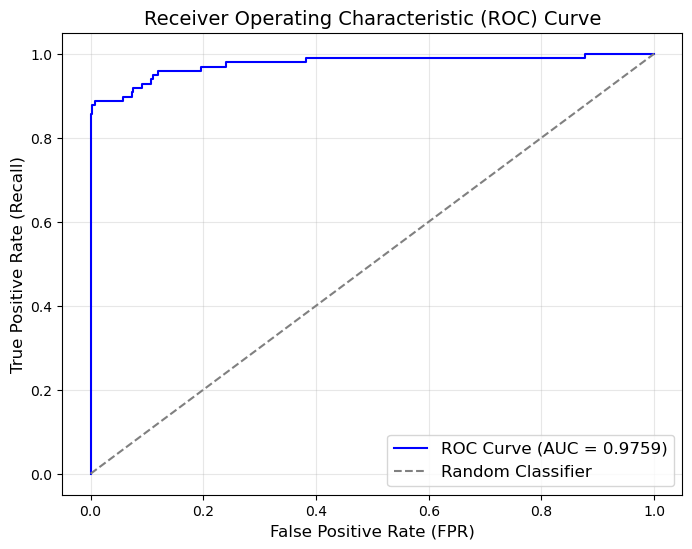

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#Predicting test probabilities
y_test_probs = logreg.predict_proba(X_test_scaled)[:, 1]  
roc_auc = roc_auc_score(y_test, y_test_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


#### Cross Validation

**After evaluating the ML model, it**

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

logreg = LogisticRegression(random_state=42, max_iter=1000, C=0.0001)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

smote = SMOTE(sampling_strategy=0.1, random_state=42)
undersampler = RandomUnderSampler(sampling_strategy=0.2, random_state=42)  # Balance the classes
scaler = StandardScaler()

pipeline = Pipeline([
   ('smote', smote),
     ('scaler', scaler),
    ('undersampler',undersampler),
    ('model', logreg)
])

precision_scorer = make_scorer(precision_score)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=precision_scorer)

print(f"Cross-validation precision scores: {cv_scores}")
print(f"Average precision score: {cv_scores.mean()}")


Cross-validation precision scores: [0.74757282 0.78301887 0.82291667 0.79787234 0.73394495]
Average precision score: 0.7770651289358297


**The average cross validation F1-score is also around 0.77**

## Support Vector Machine

**Now we use a distance based ML model called Support Vector Machine (SVM). SVM is a distance-based algorithm, as its decision-making process relies on finding the optimal hyperplane that maximizes the margin (distance) between classes. In a 2D space, this hyperplane is a line; in a 3D space, it’s a plane, and in higher dimensions, it’s a hyperplane. SVM maximizes the margin, which is the distance between the hyperplane and the nearest data points from both classes.**


**An important part of classification using SVM, is selecting an appropriate kernel which is a mathematical function used to transform the input data into a higher-dimensional space where a linear hyperplane can better separate the classes. Some common kernels used in SVM include linear, polynomial, radial basis function etc. For our project we use a linear and a polynomial kernel, specified by the kernel parameter in the SVC method. A regularization paramter (C) is also specified. A lower value of C is used which helps in lowering the chances of overfitting.**

In [29]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Initialize the SVM model with class weight balanced. A low C value is used to reduce chances of overfitting.A linear kernel is used.
svm_model = SVC(kernel='linear', class_weight='balanced', C=0.001, random_state=42, probability=True) 


In [30]:
# Training the SVM model
svm_model.fit(X_train_scaled, y_train_upsampled)


SVC(C=0.001, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

In [31]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

In [32]:
# Confusion matix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[56362   502]
 [   11    87]]


In [33]:
#Other parameters

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.89      0.25        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962



**The F1-score obtained for this model is 0.25, which is very low. Though the recall is high, the precision (correctly predicted frauds to total predicted frauds) is very low. Next we try a polynomial kernel, to see if it improves the metrics.**

**SVM model with the polynomial kernel.**

Confusion Matrix:
[[56788    76]
 [   15    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.85      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.92      0.82     56962
weighted avg       1.00      1.00      1.00     56962


AUC-ROC Score: 0.96


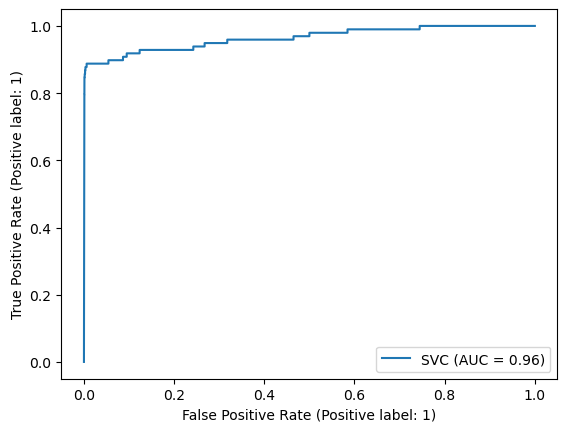

In [34]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Initialize the SVM model with class weight balanced
svm_model = SVC(kernel='poly', class_weight='balanced', C=0.01, random_state=42, probability=True)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train_upsampled)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display the AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC Score: {roc_auc:.2f}")

# Plot the ROC Curve
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)


**Though there is a significant improvement in the F1-score when using a polynomial kernel, it is still lower as compared to the Logistic Regression model. Distance-based models are not ideal when the data is highly imbalanced. Next we try Random Forest model, which is a tree based model.**

## Random Forest

**The next model we implement for the project is the <u>Random Forest Model</u>. Random Forest is a tree-based model which performs better than the traditional Machine Learning models like Logistic Regression. This is because its structure and inherent properties make it robust and effective for handling the challenges posed by class imbalance. Random Forest is an ensemble learning technique combining several indivdual Decision Trees. Random Forest aggregates predictions from all trees through majority voting (classification). Since each tree is trained on a slightly different subset, the model benefits from diverse perspectives, helping it generalize well even for the minority class.**

**We first start with initialising the random forest model and fitting it on the raw, untreated data to see how the model performs.**

**We get a perfect classification on the training set, across all evaluation parameters. However, it is  not necessarily an indication that the model is performing perfectly. Only the test metrics can be considered as the evaluating parameter to judge the performance of the models.**

In [35]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Random Forest initialisation and fitting
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_upsampled, y_train_upsampled)

y_train_pred = rf_model.predict(X_train_upsampled)
y_test_pred = rf_model.predict(X_test)

print("Training Accuracy Score:", accuracy_score(y_train_upsampled, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_train_upsampled, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train_upsampled, y_train_pred))

print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

#control max-depth
#col_sample_bytree-- for train overfitting
#child nodes number- parameter

Training Accuracy Score: 1.0
Training Confusion Matrix:
 [[113725      0]
 [     0  22745]]
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113725
           1       1.00      1.00      1.00     22745

    accuracy                           1.00    136470
   macro avg       1.00      1.00      1.00    136470
weighted avg       1.00      1.00      1.00    136470

Test Accuracy Score: 0.9993328885923949
Test Confusion Matrix:
 [[56838    26]
 [   12    86]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.88      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962



**The metrics obtained in this model are far better than SVM. Random Forest seems to be working much better as compared to SVM. To test different parameters for this model, to see if we can get better metrics, we can perform hyperparameter tuning. The next cell performs randomized search for 15 iterations with 2 cross-validation folds. The F1-score obtained is 0.82**

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

rf = RandomForestClassifier(random_state=42)

#defining the dictionary of the parameters across which the Randomized Search will take place.
param_dist = {
    'n_estimators': randint(100, 500),  
    'max_depth': randint(10, 50),      
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 10),   
    'max_features': ['auto', 'sqrt', 'log2'], 
    'bootstrap': [True, False]
}

#Defining the parameters of the search and fitting the model.
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=15, cv=2, 
    n_jobs=-1, random_state=42, verbose=10, scoring='accuracy' 
)

random_search.fit(X_train_upsampled, y_train_upsampled)

#Printing out the best performing parameters.
print("Best Parameters:", random_search.best_params_)


Fitting 2 folds for each of 15 candidates, totalling 30 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 152}


In [37]:
# Getting the best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Getting the best model and evaluating on the train and test set
best_model = random_search.best_estimator_

# Training Metrics
y_train_pred = best_model.predict(X_train_upsampled)
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train_upsampled, y_train_pred)}")
print(confusion_matrix(y_train_upsampled, y_train_pred))
print(classification_report(y_train_upsampled, y_train_pred))

# Test Metrics
y_test_pred = best_model.predict(X_test)
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 152}
Training Metrics:
Accuracy: 1.0
[[113725      0]
 [     0  22745]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113725
           1       1.00      1.00      1.00     22745

    accuracy                           1.00    136470
   macro avg       1.00      1.00      1.00    136470
weighted avg       1.00      1.00      1.00    136470

Test Metrics:
Accuracy: 0.999403110845827
[[56842    22]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.88      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962



**There is not a significant improvement in the F1-score observed after the hyperparameter tuning. It was 0.82 earlier, after Randomized Search, it increased to 0.83. To try and improve the F1-score further, we use the XGBoost model next.**

## XGBoost

**The final model used for this project is a tree based ensemble boosting model called XGBoost (eXtreme Gradient Boosting). XGBoost uses decision trees as its base models. XGBoost builds trees sequentially, where each tree attempts to correct the errors of the previous one. It minimizes a loss function by optimizing tree splits. Predictions from all trees are combined (summed) to make the final prediction. XGBoost builds trees iteratively by using the gradient of the loss function to improve predictions. The contribution of each tree is weighted based on its performance.**



 

**XGBoost, unlike the previously used models, is not a part of scikit-Learn, but is a part of it's own module called "xgboost". First XGBoost needs to be installed before it can be imported, as it is not pre-installed in most IDEs:**

In [38]:
#!pip install xgboost 

**We now use the XGBoost classifier to train and test our model. One of the advantages of XGBoost classifier is that it has a number of parameters which allow us to deal with highly imbalanced data, as is the case with this project.** 

**The most important of these is the scale_pos_weight parameter. The scale_pos_weight parameter in XGBoost is used to address class imbalance in classification problems, especially binary classification. It helps by adjusting the weight of positive class instances during the optimization of the loss function.This ensures the model doesn't become biased toward the majority class, which is common in imbalanced datasets such as this one. The weight for the positive class is increased based on the imbalance ratio. "scale_pos_weight" is defined as the ratio of number of non-fraudulent samples to the number of fraud samples. It also takes an "objective" parameter to define the type of loss function the algorithm will optimize during training. In this case the binary logistic function is used. The loss function penalizes misclassification of the minority class more heavily, which encourages the model to pay more attention to the minority class.**

**In the next few cells we use the XGBoost model to predict fraud:**

In [39]:
import xgboost as xgb
#initialising the XGBoost classifier method 
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)


In [40]:
# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_clf.predict(X_train)

In [41]:
# Evaluate on training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("Training Accuracy Score:", train_accuracy)
print("\nTraining Confusion Matrix:\n", train_conf_matrix)
print("\nTraining Classification Report:\n", train_class_report)

Training Accuracy Score: 0.9997937194145142

Training Confusion Matrix:
 [[227404     47]
 [     0    394]]

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      1.00      0.94       394

    accuracy                           1.00    227845
   macro avg       0.95      1.00      0.97    227845
weighted avg       1.00      1.00      1.00    227845



In [42]:
# Predicting on the test set
y_test_pred = xgb_clf.predict(X_test)

# Evaluating on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("\nTest Accuracy Score:", test_accuracy)
print("\nTest Confusion Matrix:\n", test_conf_matrix)
print("\nTest Classification Report:\n", test_class_report)


Test Accuracy Score: 0.9993153330290369

Test Confusion Matrix:
 [[56841    23]
 [   16    82]]

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.84      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



**The F1-score of 0.81 is along similar lines as the Random Forest. This score however can be improved if we try to tune the hyperparameters of the model. For hyperparameter tuning we use GridSearchCV. Grid Search allows us to specify a number of different hyperparameters and train our model on them. After training the model on the different hyperparameters, we can get the set of parameters which gives us the best possible performance based on a specified metric (in this case F1-score).**

**The next cell performs the GridSearch for the specified parameters in the param_grid dictionary.**

In [43]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from xgboost import XGBClassifier

scale_pos_weight = len(y_train) / (2.0 * np.sum(y_train == 1))

param_grid = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.1, 0.2],  
    'max_depth': [3, 5],  
    'subsample': [0.8],  
    'colsample_bytree': [0.8], 
    'scale_pos_weight': [scale_pos_weight, 1]  
}

# Create the XGBoost model
xgb_model = XGBClassifier()

# Set up GridSearchCV with reduced fits (3-fold cross-validation)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='f1', cv=3, verbose=3, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.1, 0.2],
                         'max_depth': [3, 5], 'n_estimators': [100, 200],
                         'scale_pos_weight': [289.14340101522845, 1],
                         'subsample': [0.8]},
             scoring='f1', verbose=3)

**After fitting the Grid Search, we can obtain the best performing parameters, as well as the evaluation metrics for them, as shown in the below cell.**

In [44]:

# Getting the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Getting the best model and evaluating on the train and test set
best_model = grid_search.best_estimator_

# Training Metrics
y_train_pred = best_model.predict(X_train)
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Test Metrics
y_test_pred = best_model.predict(X_test)
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
Training Metrics:
Accuracy: 0.9999561105137265
[[227451      0]
 [    10    384]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.97      0.99       394

    accuracy                           1.00    227845
   macro avg       1.00      0.99      0.99    227845
weighted avg       1.00      1.00      1.00    227845

Test Metrics:
Accuracy: 0.9995962220427653
[[56857     7]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



**The best F1-score obtained using the metrics shown above by Grid Search was 0.88. It is better than the score obtained for the previous models**

**In order to test the model based on these parameters we can create an XGBoost model and specify these parameters:**

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model with the best parameters
best_xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=200,
    scale_pos_weight=1,
    subsample=0.8,
    use_label_encoder=False,  
    eval_metric='logloss'     
)

# Training the model on the training data
best_xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

**To test the model independent of Grid Search**

In [46]:
# Predicting on the test set
y_test_pred = best_xgb_model.predict(X_test)

# Classification metrics
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Test Metrics:
Accuracy: 0.9995962220427653
[[56857     7]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



**We can also get the importance of each of the features in this model and plot them as shown below:**

<Figure size 1000x800 with 0 Axes>

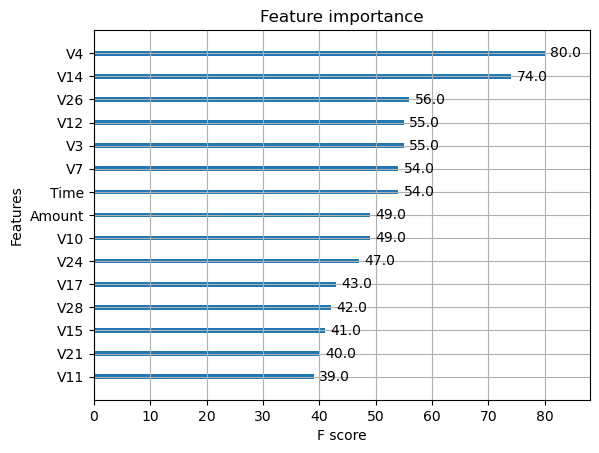

In [47]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb_model, max_num_features=15)  # Show top 10 features
plt.show()


# Saving and reloading the model

**The final XGBoost can be saved for deployment in a number of ways. A common method used for saving Machine Learning models is by using the pickle library. The following cell we save the model as a pickle file. The name of the model is "best_xgb_model" and the name of the pickle file is "xgboost_model.pkl"**

In [48]:
import pickle

# Save the model to a file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)

**After saving the model, we can relaod the model to verify it is working by printing the test evaluation metrics. This is done in the following cell:**

In [49]:
# Load the saved model
with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Test Metrics:
Accuracy: 0.9995962220427653
[[56857     7]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



**The evaluation metrics obtained after reloading the "best_xgb_model" from the "xgboost_model.pkl" file were identical to the ones obtained when the models was created earlier.**

## Conclusion

**This concludes the credit-card fraud prediction project. Some of the important conclusions are as follows:**
- **For a dataset which is as imbalanced as the one used in this project, it is important to transform the data when using simpler Machine Learning models to ensure that they can perform well.**
- **Stratifying on the minority class is important when splitting the data to ensure that both the train and test datasets have a representation of the minority class.**
- **Selecting the appropriate evaluation metric is also essential. A metric like accuracy might yield very high values on the train data; however this can be very misleading due to the highly imbalanced nature of the data which leads to the majority class dominating the accuracy.**
- **As a result metrics like precision, recall and F1-score are more appropriate for such a problem. In this problem, F1-score was employed as the metric of choice as it takes into account both precision and recall and gives a balanced evaluation quantity.**
- **The model of choice is an important decision. 4 models were used in this problem: Logistic Regression, Support Vector Machines, Random Forest and XGBoost.**
- **Logistic Regression is a probabalistic model, which is not always apt for such classification problems, especially when the dataset is highly imbalanced, like this case. It can be too simplistic and does not catch the mainority class accurately, because it assumes a linear decision boundary.**
- **Support Vector Machine is a distance based model, which is highly sensitive to imbalanced data. This makes this model not the best choice for fraud prediction. This was evident from the low precision obtained using this model. SVM can also be computationally intensive when the dataset is large or a complex kernel is used.**
- **Random Forest is a good model for fraud detection because it can handle imabalanced data well. Random Forest, being an ensemble of Decision Trees is able to handle imabalance better than Logistic Regression and SVM.**
- **XGBoost is another tree-based ensemble model which was used in this project. XGBoost is amongst the best choices for such problems because it can inherently handle imbalance very well. Another advantage of this model is that it does not need too much data transformation and can handle unprocessed data very well through its parameters. However it can be slightly slower and more computationally intensive compared to other models.**